In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
import seaborn as sns


In [2]:
np.set_printoptions(formatter={'float':'{:}'.format})


In [3]:
df= pd.read_csv("Data.csv")

In [4]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [5]:
df.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [6]:
#Creating an object to fill missing values
impute = Imputer(missing_values="NaN", axis=0 , strategy= "mean")

X= df[["Age","Salary"]] 

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
#fillling missing values
X= impute.fit_transform(X)
X

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.77777777777778, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]])

In [8]:
#Rounding off to 0 decimal places
np.around(X,0)

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63778.0],
       [35.0, 58000.0],
       [39.0, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]])

In [9]:
#Scaling the X array containing variables
X= StandardScaler().fit_transform(X)
X

array([[0.758874361590019, 0.7494732544921677],
       [-1.7115038793306814, -1.4381784072687531],
       [-1.2755547779917342, -0.8912654918285229],
       [-0.1130238410878753, -0.253200423814921],
       [0.17760889313808945, 6.632191985654332e-16],
       [-0.5489729424268225, -0.5266568815350361],
       [0.0, -1.0735697969752662],
       [1.3401398300419485, 1.3875383225057696],
       [1.6307725642679132, 1.7521469327992565],
       [-0.2583402082008577, 0.29371249162530916]])

In [10]:
#rounding off to 2 decimal places ( We can see that it has now scaled each value on a scale between (-2,2))
np.around(X,2)

array([[0.76, 0.75],
       [-1.71, -1.44],
       [-1.28, -0.89],
       [-0.11, -0.25],
       [0.18, 0.0],
       [-0.55, -0.53],
       [0.0, -1.07],
       [1.34, 1.39],
       [1.63, 1.75],
       [-0.26, 0.29]])

# Simple Linear Regression

In [11]:
Salary = pd.read_csv("Salary_Data.csv")

In [12]:
Salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
Salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [14]:
#Separating independent and response variable for analysis
y= Salary["Salary"]
X= Salary["YearsExperience"]

In [15]:
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [16]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

Text(0, 0.5, 'Salary')

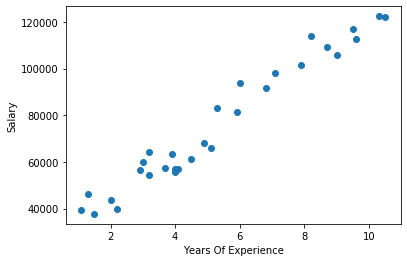

In [17]:
#Finding Correlation between the two variables
plt.scatter(X,y)
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")

In [18]:
#Adding constant for intercept coefficient as statsmodel doesn't adds on its own
X= sm.add_constant(X)
X.head()

C:\Users\owner\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2


In [19]:
model= sm.OLS(y,X)
results= model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           1.14e-20
Time:                        21:19:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
results.params

const              25792.200199
YearsExperience     9449.962321
dtype: float64

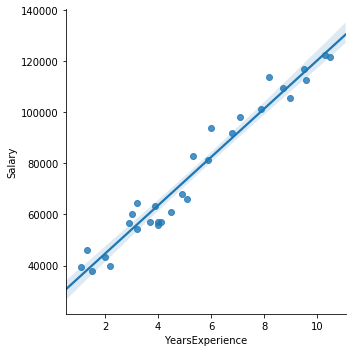

In [22]:
#Analyzing the fitted least squres line
sns.lmplot("YearsExperience","Salary", data=Salary)

In [23]:
#This is our predicted salary from the model we have created for the same dataset
predictions= results.predict(X)
predictions

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [24]:
#giving a new prediction for the person having 7 years of experience
results.predict([1,7])[0]

91941.93644885425

In [25]:
#residuals= Observed- predicted
residuals= y-predictions

In [26]:
residuals.head()

0    3155.841248
1    8127.848783
2   -2236.143681
3   -1167.124842
4   -6691.117306
dtype: float64

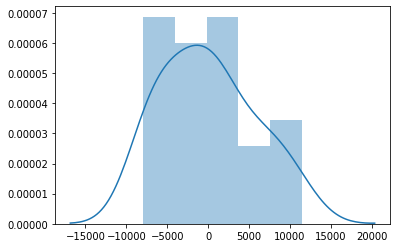

In [28]:
#Chcking normality of errors
sns.distplot(residuals)